In [ ]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
text_data = '/content/raw_analyst_ratings.csv'

try:
    df_csv = pd.read_csv(text_data, engine='python')
    print("CSV file loaded successfully.")
    print(df_csv.head())
except FileNotFoundError:
    print(f"Error: The file '{text_data}' was not found.")
except Exception as e:
    print(f"An error occurred while loading the CSV file: {e}")

CSV file loaded successfully.
   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  

In [21]:
df_csv['headline']

,headline
0,Stocks That Hit 52-Week Highs On Friday
1,Stocks That Hit 52-Week Highs On Wednesday
2,71 Biggest Movers From Friday
3,46 Stocks Moving In Friday's Mid-Day Session
4,B of A Securities Maintains Neutral on Agilent...
...,...
279404,Cooper Companies Spiking Lower on Heavy Volume
279405,Oppenheimer: Salesforce.com Has New COO
279406,Morgan Keegan Lowers PT on The Cooper Companie...
279407,Mad Money Lightning Round: Cramer Likes Apache


In [22]:
def calculate_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [24]:
try:
    df_csv['Sentiment'] = df_csv['headline'].apply(calculate_sentiment)
    print("Sentiment analysis completed.")
except Exception as e:
    print(f"An error occurred during sentiment analysis: {e}")

Sentiment analysis completed.


In [26]:
# Save results to CSV
output_file = 'news_with_sentiment.csv'
df_csv.to_csv(output_file, index=False)
print(f"Sentiment analysis results saved to {output_file}")

Sentiment analysis results saved to news_with_sentiment.csv


In [28]:
# Download the CSV to your local machine
files.download(output_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_csv.head()

Descriptive statistics for 'headline' column:
count                      279409
unique                     202980
top       Benzinga's Top Upgrades
freq                         1159
Name: headline, dtype: object

Missing values in 'headline' column:
0

Number of unique headlines:
202980

Most frequent headlines:
headline
Benzinga's Top Upgrades                     1159
Benzinga's Top Downgrades                   1051
Stocks That Hit 52-Week Lows On Thursday     842
Benzinga's Top Initiations                   813
Morning Market Losers                        708
Name: count, dtype: int64

Sentiment distribution:
count    279409.000000
mean          0.049823
std           0.185717
min          -1.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Sentiment, dtype: float64


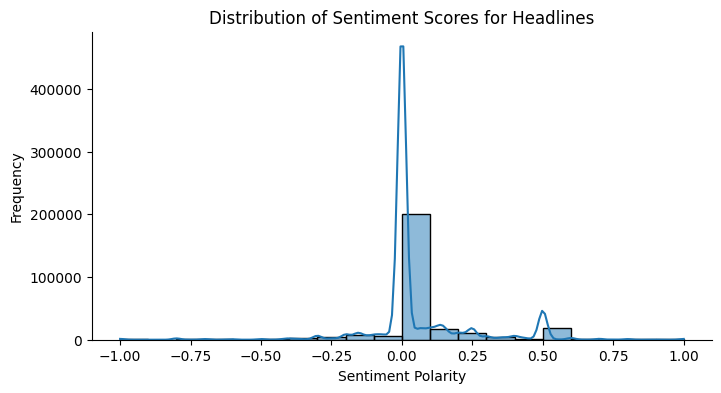


Most Positive Headlines:
                                               headline  Sentiment
819            Best Buy: Analysts' Upgrades, Downgrades        1.0
1343    OneMove(TM) Records its Best Month Ever in July        1.0
1382  Klondike Silver Completes Underground Drilling...        1.0
1849                             10 Best Stocks Of 2017        1.0
2270          Miners: The Best Way To Play A Rate Hike?        1.0

Most Negative Headlines:
                                               headline  Sentiment
2552  Tech, Semiconductors Among Worst Performers As...       -1.0
3175               I've just made a horrible investment       -1.0
5658   Worst Performing Industries For October 13, 2016       -1.0
5710   Worst Performing Industries For December 2, 2014       -1.0
6100                            10 Worst Stocks Of 2017       -1.0


In [25]:
# Display descriptive statistics for the 'headline' column
print("Descriptive statistics for 'headline' column:")
print(df_csv['headline'].describe())

# Check for missing values in the 'headline' column
print("\nMissing values in 'headline' column:")
print(df_csv['headline'].isnull().sum())

# Get the number of unique headlines
print("\nNumber of unique headlines:")
print(df_csv['headline'].nunique())

# Display the most frequent headlines
print("\nMost frequent headlines:")
print(df_csv['headline'].value_counts().head())

# You can further analyze the distribution of sentiment scores calculated earlier
print("\nSentiment distribution:")
print(df_csv['Sentiment'].describe())

# Plot the distribution of sentiment scores
plt.figure(figsize=(8, 4))
sns.histplot(df_csv['Sentiment'], bins=20, kde=True)
plt.title('Distribution of Sentiment Scores for Headlines')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

# Analyze the sentiment of the most positive and negative headlines
most_positive_headlines = df_csv.nlargest(5, 'Sentiment')
print("\nMost Positive Headlines:")
print(most_positive_headlines[['headline', 'Sentiment']])

most_negative_headlines = df_csv.nsmallest(5, 'Sentiment')
print("\nMost Negative Headlines:")
print(most_negative_headlines[['headline', 'Sentiment']])

In [ ]:
result = df_csv[df_csv['stock'] == "AAPL"]
print(result)

      Unnamed: 0                                           headline  \
6680        7120  Tech Stocks And FAANGS Strong Again To Start D...   
6681        7121      10 Biggest Price Target Changes For Wednesday   
6682        7122  Benzinga Pro's Top 5 Stocks To Watch For Wed.,...   
6683        7123  Deutsche Bank Maintains Buy on Apple, Raises P...   
6684        7124  Apple To Let Users Trade In Their Mac Computer...   
...          ...                                                ...   
7116        7585  UBS Maintains Buy on Apple, Lowers Price Targe...   
7117        7586                  123 Biggest Movers From Yesterday   
7118        7587  Crude Awakening: Energy Sector Takes A 20% Spi...   
7119        7588     Investor Movement Index Summary: February 2020   
7120        7589      101 Stocks Moving In Monday's Mid-Day Session   

                                                    url          publisher  \
6680  https://www.benzinga.com/government/20/06/1622...         JJ Ki

In [ ]:
result = df_csv[df_csv['stock'] == "FB"]
print(result)

        Unnamed: 0                                           headline  \
473873      476431  As Expected: Fed Keeps Rates Unchanged and For...   
473874      476432  Facebook, Snap Analyst Projects Q2 Revenue Ups...   
473875      476433  Tech Stocks And FAANGS Strong Again To Start D...   
473876      476434  Big Tech Reaches New Record Heights At The Sto...   
473877      476435  Twitter, Square Will Mark Juneteenth As Holida...   
...            ...                                                ...   
474248      476816  Facebook To Pay Users $5 For Their Voice Recor...   
474249      476817  No More Immunity? Justice Department Wants Tec...   
474250      476818  Peter Thiel-Backed Startup Begins Mining Bitco...   
474251      476819  Bloomberg Pays People To Promote His Campaign ...   
474252      476820  Calendar Apps Can Do Wonders And Not Only For ...   

                                                      url          publisher  \
473873  https://www.benzinga.com/news/20/06